# Example on how to visualise embeddings with TensorFlow
It's easy to visualise an embeddings-space in with TensorFlow. In this case I'm using TensorFlow 2. The best tool to achieve this is using the TensorFlow Projector: an online tool which basically does all heavy lifting for you. The only thing you have to do for this is saving your embeddings (or raw data) and drag it into the tool. Here I show how to do it with MNIST data, where I assume each raw MNIST digit is an embedding. 

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import json
import numpy as np

print("The TensorFlow version used in this tutorial is", tf.__version__)

TO_EMBED_COUNT = 8000

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()
batch_xs, batch_ys = x_train[:TO_EMBED_COUNT, :], y_train[:TO_EMBED_COUNT]

The TensorFlow version used in this tutorial is 2.2.0


# Save the vectors

Save the vectors so we can upload them to http://projector.tensorflow.org/


In [2]:
with open("exported_data/vectors.tsv", 'w') as f:
    for image in batch_xs:
        image = image.flatten()
        f.write("\t".join([str(a) for a in image]))
        f.write("\n")
with open('exported_data/labels.tsv', 'w') as f:
    for label in batch_ys: 
        f.write(str(label) + "\n")

![savebutton](https://raw.githubusercontent.com/rmeertens/tensorexamples/master/notebooks/embedded_images/uploadbutton.png)
![pca](https://raw.githubusercontent.com/rmeertens/tensorexamples/master/notebooks/embedded_images/pca.png)

# Get an embedding space 
Run the t-sne algorithm. Then save a bookmark in the bottom-right corner. For me t-sne already gave nice results after 165 iterations: 
![tsne](https://raw.githubusercontent.com/rmeertens/tensorexamples/master/notebooks/embedded_images/tsne.png)

## Importing the embeddings
After you ran the embedding projection it's also possible to re-import your embeddings. To do this you first click the "booksmarks" button in the lower-right corner. Click on the plus sign to add a state, and then on the save icon to download the state as a text file. 

In [3]:
# The names of the variables you want to visualise in the bookmark
names = ["tsne-0", "tsne-1", "tsne-2"]

# Load the embedding space from tensorboard
with open('exported_data/state.txt') as f: 
    for line in f:
        j = json.loads(line)[0]
        
# Save X,Y,Z and the true label we will use for visualisation        
xyz = list()
for point, label in zip(j['projections'], batch_ys):
    if names[0] not in point:
        continue
    toap = list()

    for name in names: 
        toap.append(point[name])
    toap.append(label)
    xyz.append(toap)        
    
# Make it a numpy array with scaled color for the class.     
tovis = np.array(xyz, dtype=np.float32)
tovis[:, 3] /= 255.0
tovis[:, 3] *= 20

# Save it in the way which is expected
tovis.byteswap().tofile('embeddings.npy')

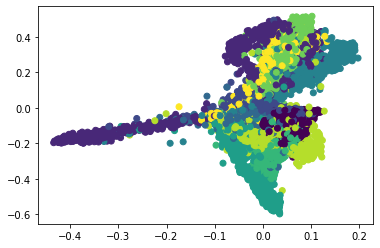

In [4]:
# Scatter the points to make sure we stored the right thing
plt.scatter(tovis[:, 0], tovis[:, 1], c=tovis[:, 3])

This will get you this image:
![embed](https://raw.githubusercontent.com/rmeertens/tensorexamples/master/notebooks/embedded_images/image_numpy_embedding.png)

## Conclusion
As you can see the TensorFlow Projector is an easy way to both visualise your embedding space. It's also possible to re-import the embeddings into your Jupyter Notebook. This allows you to do unsupervised learning, or more data analysis on your latent space. 